In [1]:
# Code for Module 5 of UT Bootcamp - PyBer Ridesharing scenario
# Curriculum Exercises for Sections 5.2.1 to 5.7.3

In [2]:
# Add Matplotlib for displaying in Jupyter Notebook
# dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
print(city_data_df.shape)
city_data_df.head()


(120, 3)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
print(ride_data_df.shape)
ride_data_df.head()

(2375, 4)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Check for null values, data types of columns, etc.
print("City Data Dataframe")
print(city_data_df.isna().sum())
print(city_data_df.dtypes)
#print(city_data_df["type"].unique())
print(city_data_df["type"].value_counts())
print(city_data_df["city"].value_counts())
print("\n\nRide Data Dataframe")
print(ride_data_df.isna().sum())
print(ride_data_df.dtypes)
print(ride_data_df["city"].value_counts())

City Data Dataframe
city            0
driver_count    0
type            0
dtype: int64
city            object
driver_count     int64
type            object
dtype: object
Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64
North Jeffrey       1
Jessicaport         1
Penaborough         1
Veronicaberg        1
Rodneyfort          1
                   ..
Rogerston           1
West Samuelburgh    1
Lake Jamie          1
Williamsstad        1
New Olivia          1
Name: city, Length: 120, dtype: int64


Ride Data Dataframe
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object
West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
                   ..
Randallchester      5
Penaborough         5
South Saramouth     4
Newtonview          4
Garzaport           3
Name: city, Length: 120, dtype: int64


In [6]:
# Merge data 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left',on=['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
# Data analysis and initial Bubble Chart

# Create separate df for each city type
urban_cities_df = pyber_data_df[ pyber_data_df["type"]=='Urban' ]
suburban_cities_df = pyber_data_df[ pyber_data_df["type"]=='Suburban' ]
rural_cities_df = pyber_data_df[ pyber_data_df["type"]=='Rural' ]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
# Create series to store values for each city type grouped by city.
# Counts will form the x-axis for the bubble chart
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
# Average fares will form the y-axis for the bubble chart
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
# Average number of drivers will determine the size of the circles on bubble chart
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

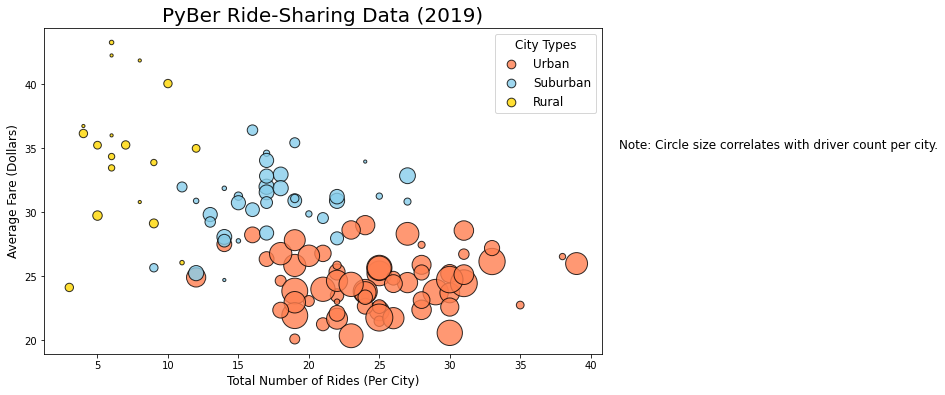

In [36]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
           c='coral', edgecolor='black',
           linewidths=1, alpha=0.8, label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count,
           c='skyblue', edgecolor='black',
           linewidths=1, alpha=0.8, label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count,
           c='gold', edgecolor='black',
           linewidths=1, alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare (Dollars)', fontsize=12)
#plt.grid(True)
lgnd = plt.legend(fontsize=12, mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize=12)
plt.show()